In [2]:
import salem
import json
from IPython.display import display
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import MultiPolygon, Polygon
import matplotlib as mpl

In [55]:
df_shp = salem.read_shapefile(r'C:/Users/15311/Desktop/natural_earth_vector/110m_cultural/ne_110m_admin_0_countries.shp')

## Normal shp: 1:10,000,000; 1″ = 158 miles; 1 cm = 100 km
<br>
## FJI, shpping secotr for LAO, NLD, NZL, NOR, non-road transportation sector of SAU:
<br>
## 1:110,000,000, 1″ = 1,736 miles, 1 cm = 1,100 km

https://www.naturalearthdata.com/downloads/

In [58]:
i = 'FJI'
country_shp = df_shp.loc[df_shp['ADM0_A3'].isin([i])]
a = country_shp['geometry'].__geo_interface__
geojason = a['features'][0]['geometry']

In [59]:
geojason

{'type': 'MultiPolygon',
 'coordinates': [(((180.0, -16.067132663642447),
    (180.0, -16.555216566639196),
    (179.36414266196414, -16.801354076946883),
    (178.72505936299711, -17.01204167436804),
    (178.59683859511713, -16.639150000000004),
    (179.0966093629971, -16.433984277547403),
    (179.4135093629971, -16.379054277547404),
    (180.0, -16.067132663642447)),),
  (((178.12557, -17.50481),
    (178.3736, -17.33992),
    (178.71806, -17.62846),
    (178.55271, -18.15059),
    (177.93266000000003, -18.28799),
    (177.38146, -18.16432),
    (177.28504, -17.72465),
    (177.67087, -17.381140000000002),
    (178.12557, -17.50481)),),
  (((-179.79332010904864, -16.020882256741224),
    (-179.9173693847653, -16.501783135649397),
    (-180.0, -16.555216566639196),
    (-180.0, -16.067132663642447),
    (-179.79332010904864, -16.020882256741224)),)]}

In [61]:
180 + 180 - 179.79332010904864

180.20667989095136

In [62]:
180 + 180 - 179.9173693847653

180.0826306152347

## FJI:  CHANGE -179.79 to 180 + (180- 179.79)

Fiji is too small and scatters in east and west half globe.

<AxesSubplot:>

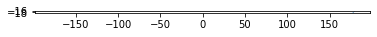

In [60]:
country_shp.plot()

In [51]:
file=open(i + ".json",'w')
json.dump(geojason,file)
file.close()

In [41]:
f = gpd.GeoDataFrame.from_file('json/FJI.json')

<AxesSubplot:>

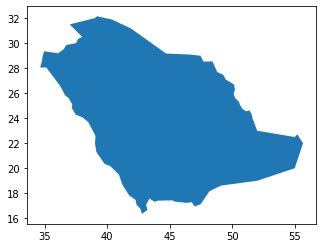

In [35]:
f.plot()

In [36]:
f['geometry'].__geo_interface__['features'][0]['geometry'] == geojason

True